In [88]:
# Import the necessary libraries
import pandas as pd
import os

In [89]:
# Loading the datasets
# Define the file paths
restaurant_data_path= r"C:\Users\Administrator\Downloads\restaurants.csv"
review_data_path= r"C:\Users\Administrator\Downloads\Restaurant reviews.csv\Restaurant reviews.csv"

# Use pandas to load the files
restaurant_data= pd.read_csv(restaurant_data_path, encoding='ISO-8859-1')
review_data= pd.read_csv(review_data_path)

### restaurant data
Exploring and cleaning restaurant Data


In [90]:
# Preview the datasets
# Restaurant Data
restaurant_data.head()


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
2,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': ""u'full_bar'"", '...","Pubs, Restaurants, Italian, Bars, American (Tr...",NaN
3,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
4,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,NaN,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ""'none'"", 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."


In [91]:
restaurant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52286 entries, 0 to 52285
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   52286 non-null  object 
 1   name          52286 non-null  object 
 2   address       51843 non-null  object 
 3   city          52286 non-null  object 
 4   state         52286 non-null  object 
 5   postal_code   52265 non-null  object 
 6   latitude      52286 non-null  float64
 7   longitude     52286 non-null  float64
 8   stars         52286 non-null  float64
 9   review_count  52286 non-null  int64  
 10  is_open       52286 non-null  int64  
 11  attributes    51720 non-null  object 
 12  categories    52286 non-null  object 
 13  hours         45007 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 5.6+ MB


In [92]:
# Drop rows with missing attributes
restaurant_data.dropna(subset= ['attributes'], inplace= True)

# Fill missing values with 'unknown' in multiple columns
restaurant_data.fillna( {
    'address':'Unknown Address',
    'postal_code':'Unknown',
    'hours': 'Unavailable'
}, inplace= True)


In [93]:
# Drop latitude and longitude columns as they are not required
restaurant_data.drop(columns=['latitude', 'longitude'], inplace=True)


In [94]:
restaurant_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51720 entries, 0 to 52285
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   51720 non-null  object 
 1   name          51720 non-null  object 
 2   address       51720 non-null  object 
 3   city          51720 non-null  object 
 4   state         51720 non-null  object 
 5   postal_code   51720 non-null  object 
 6   stars         51720 non-null  float64
 7   review_count  51720 non-null  int64  
 8   is_open       51720 non-null  int64  
 9   attributes    51720 non-null  object 
 10  categories    51720 non-null  object 
 11  hours         51720 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 5.1+ MB


No missing values and 2 columns dropped as they are not required

In [95]:
review_data.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN


In [96]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  10000 non-null  object 
 1   Reviewer    9962 non-null   object 
 2   Review      9955 non-null   object 
 3   Rating      9962 non-null   object 
 4   Metadata    9962 non-null   object 
 5   Time        9962 non-null   object 
 6   Pictures    10000 non-null  int64  
 7   7514        1 non-null      float64
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


In [97]:

# Dropping the unnecessary columns
review_data.drop(columns=['7514','Pictures','Reviewer'], inplace=True)


In [98]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Review      9955 non-null   object
 2   Rating      9962 non-null   object
 3   Metadata    9962 non-null   object
 4   Time        9962 non-null   object
dtypes: object(5)
memory usage: 390.8+ KB


In [99]:
# Dropping rows where r Review is missing 
review_data.dropna(subset=['Review'], inplace=True)

# Filling missing Rating values with a default value 
review_data['Rating'].fillna('Unknown', inplace=True)
review_data['Metadata'].fillna('Unknown', inplace=True)
review_data['Time'].fillna('Unknown', inplace=True)



In [100]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9955 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9955 non-null   object
 1   Review      9955 non-null   object
 2   Rating      9955 non-null   object
 3   Metadata    9955 non-null   object
 4   Time        9955 non-null   object
dtypes: object(5)
memory usage: 466.6+ KB


In [101]:
# Change the name to Restaurant so as to have a common name to merge the datasets
restaurant_data.rename(columns={'name': 'Restaurant'}, inplace=True)


In [102]:
# Merge the datasets to form one dataset for easier Analysis 
merged_data = pd.merge(review_data, restaurant_data, on='Restaurant', how='inner')

# Preview the merged data
merged_data.head()


,Restaurant,Review,Rating,Metadata,Time,business_id,address,city,state,postal_code,stars,review_count,is_open,attributes,categories,hours
0,KFC,Good atmosphere to eat with relax.tastes good....,4,"10 Reviews , 1 Follower",5/22/2019 17:21,yFqq66GxRjnhZXPgjA6hnw,716 Adams Ave,Philadelphia,PA,19124,2.0,7,1,"{'OutdoorSeating': 'False', 'WiFi': ""'free'"", ...","Restaurants, Chicken Shop, Fast Food, Chicken ...","{'Monday': '10:30-23:0', 'Tuesday': '10:30-23:..."
1,KFC,Good atmosphere to eat with relax.tastes good....,4,"10 Reviews , 1 Follower",5/22/2019 17:21,0xe81EigRw_b5W8tg0Ca6Q,8242 Little Rd,New Port Richey,FL,34654,1.5,19,1,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...","Fast Food, Chicken Wings, Restaurants, Chicken...","{'Monday': '10:30-23:0', 'Tuesday': '10:30-23:..."
2,KFC,Good atmosphere to eat with relax.tastes good....,4,"10 Reviews , 1 Follower",5/22/2019 17:21,nqzOH_1CBGe2VrsxTziuvg,430 S 15th St,Saint Louis,MO,63103,1.5,5,0,"{'RestaurantsTakeOut': 'True', 'GoodForKids': ...","Chicken Shop, Chicken Wings, Fast Food, Restau...",Unavailable
3,KFC,Good atmosphere to eat with relax.tastes good....,4,"10 Reviews , 1 Follower",5/22/2019 17:21,a8Q2bvUW6mAiws7xW7cS6g,104 N Pottstown Pike,Exton,PA,19341,1.5,45,1,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...","Restaurants, Fast Food, Chicken Wings, Chicken...","{'Monday': '10:30-0:0', 'Tuesday': '10:30-0:0'..."
4,KFC,Good atmosphere to eat with relax.tastes good....,4,"10 Reviews , 1 Follower",5/22/2019 17:21,rZZ6gtsqBVkpSLoZ9EZ_1A,3144 Tampa Rd,Oldsmar,FL,34677,1.5,28,0,"{'OutdoorSeating': 'False', 'RestaurantsAttire...","Chicken Wings, Chicken Shop, Restaurants, Fast...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-22:0', ..."


In [117]:
# Renaming columns in the merged DataFrame
merged_data.rename(columns={
    'Rating': 'User rating',  
    'stars': 'b/s rating'     
}, inplace=True)



In [118]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46707 entries, 0 to 46706
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Restaurant    46707 non-null  object 
 1   Review        46707 non-null  object 
 2   User rating   46707 non-null  object 
 3   Metadata      46707 non-null  object 
 4   Time          46707 non-null  object 
 5   business_id   46707 non-null  object 
 6   b/s rating    46707 non-null  float64
 7   review_count  46707 non-null  int64  
 8   is_open       46707 non-null  int64  
 9   attributes    46707 non-null  object 
 10  categories    46707 non-null  object 
 11  hours         46707 non-null  object 
 12  Location      46707 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 5.0+ MB


In [148]:
merged_data.isna().sum()

Restaurant      0
Review          0
User rating     0
Metadata        0
Time            0
business_id     0
b/s rating      0
review_count    0
attributes      0
categories      0
hours           0
Location        0
dtype: int64

No missing values

In [104]:
merged_data.describe()

,stars,review_count,is_open
count,46707.000000,46707.000000,46707.000000
mean,2.127754,19.717066,0.931680
std,0.658564,14.865314,0.252296
min,1.000000,5.000000,0.000000
25%,1.500000,11.000000,1.000000
50%,2.000000,15.000000,1.000000
75%,2.500000,25.000000,1.000000
max,4.500000,131.000000,1.000000


Deal with duplicates to avoid misleading insights

In [105]:
# Check for Duplicates
print('Duplicates:', merged_data.duplicated().sum())

Duplicates: 0


In [106]:
# Feature engineer some columns that are similar to each other and have the same function
# Combine address columns
merged_data['Location'] = merged_data[['city','state','address']]\
                     .apply(lambda x: f"State: {x['state']}, City: {x['city']}, Address: {x['address']}", axis = 1)

# Drop combined columns
merged_data.drop(columns = ['city','state','address','postal_code'], axis= 1, inplace= True)


In [107]:
merged_data.head()

,Restaurant,Review,Rating,Metadata,Time,business_id,stars,review_count,is_open,attributes,categories,hours,Location
0,KFC,Good atmosphere to eat with relax.tastes good....,4,"10 Reviews , 1 Follower",5/22/2019 17:21,yFqq66GxRjnhZXPgjA6hnw,2.0,7,1,"{'OutdoorSeating': 'False', 'WiFi': ""'free'"", ...","Restaurants, Chicken Shop, Fast Food, Chicken ...","{'Monday': '10:30-23:0', 'Tuesday': '10:30-23:...","State: PA, City: Philadelphia, Address: 716 Ad..."
1,KFC,Good atmosphere to eat with relax.tastes good....,4,"10 Reviews , 1 Follower",5/22/2019 17:21,0xe81EigRw_b5W8tg0Ca6Q,1.5,19,1,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...","Fast Food, Chicken Wings, Restaurants, Chicken...","{'Monday': '10:30-23:0', 'Tuesday': '10:30-23:...","State: FL, City: New Port Richey, Address: 824..."
2,KFC,Good atmosphere to eat with relax.tastes good....,4,"10 Reviews , 1 Follower",5/22/2019 17:21,nqzOH_1CBGe2VrsxTziuvg,1.5,5,0,"{'RestaurantsTakeOut': 'True', 'GoodForKids': ...","Chicken Shop, Chicken Wings, Fast Food, Restau...",Unavailable,"State: MO, City: Saint Louis, Address: 430 S 1..."
3,KFC,Good atmosphere to eat with relax.tastes good....,4,"10 Reviews , 1 Follower",5/22/2019 17:21,a8Q2bvUW6mAiws7xW7cS6g,1.5,45,1,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...","Restaurants, Fast Food, Chicken Wings, Chicken...","{'Monday': '10:30-0:0', 'Tuesday': '10:30-0:0'...","State: PA, City: Exton, Address: 104 N Pottsto..."
4,KFC,Good atmosphere to eat with relax.tastes good....,4,"10 Reviews , 1 Follower",5/22/2019 17:21,rZZ6gtsqBVkpSLoZ9EZ_1A,1.5,28,0,"{'OutdoorSeating': 'False', 'RestaurantsAttire...","Chicken Wings, Chicken Shop, Restaurants, Fast...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-22:0', ...","State: FL, City: Oldsmar, Address: 3144 Tampa Rd"


In [112]:
merged_data['categories'].value_counts()

categories
Pizza, Chicken Wings, Restaurants, Sandwiches                                  1683
Restaurants, Pizza, Chicken Wings, Sandwiches                                  1683
Pizza, Restaurants, Sandwiches, Chicken Wings                                  1584
Pizza, Restaurants, Chicken Wings, Sandwiches                                  1485
Restaurants, Fast Food, Chicken Wings, Chicken Shop                            1400
                                                                               ... 
Restaurants, Salad, Pizza, Sandwiches, Chicken Wings                             99
Pizza, Food Delivery Services, Restaurants, Food, Sandwiches, Chicken Wings      99
Italian, Pizza, Chicken Wings, Sandwiches, Restaurants                           99
Sandwiches, Chicken Wings, Pizza, Restaurants, Italian                           99
Restaurants, Pizza, Italian, Chicken Wings, Sandwiches                           99
Name: count, Length: 143, dtype: int64

In [114]:
# Select restaurants only
merged_data= merged_data.loc[merged_data.categories.str.contains('Restaurants')]
merged_data.shape

(46707, 13)

In [119]:
merged_data.head()

,Restaurant,Review,User rating,Metadata,Time,business_id,b/s rating,review_count,is_open,attributes,categories,hours,Location
0,KFC,Good atmosphere to eat with relax.tastes good....,4,"10 Reviews , 1 Follower",5/22/2019 17:21,yFqq66GxRjnhZXPgjA6hnw,2.0,7,1,"{'OutdoorSeating': 'False', 'WiFi': ""'free'"", ...","Restaurants, Chicken Shop, Fast Food, Chicken ...","{'Monday': '10:30-23:0', 'Tuesday': '10:30-23:...","State: PA, City: Philadelphia, Address: 716 Ad..."
1,KFC,Good atmosphere to eat with relax.tastes good....,4,"10 Reviews , 1 Follower",5/22/2019 17:21,0xe81EigRw_b5W8tg0Ca6Q,1.5,19,1,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...","Fast Food, Chicken Wings, Restaurants, Chicken...","{'Monday': '10:30-23:0', 'Tuesday': '10:30-23:...","State: FL, City: New Port Richey, Address: 824..."
2,KFC,Good atmosphere to eat with relax.tastes good....,4,"10 Reviews , 1 Follower",5/22/2019 17:21,nqzOH_1CBGe2VrsxTziuvg,1.5,5,0,"{'RestaurantsTakeOut': 'True', 'GoodForKids': ...","Chicken Shop, Chicken Wings, Fast Food, Restau...",Unavailable,"State: MO, City: Saint Louis, Address: 430 S 1..."
3,KFC,Good atmosphere to eat with relax.tastes good....,4,"10 Reviews , 1 Follower",5/22/2019 17:21,a8Q2bvUW6mAiws7xW7cS6g,1.5,45,1,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...","Restaurants, Fast Food, Chicken Wings, Chicken...","{'Monday': '10:30-0:0', 'Tuesday': '10:30-0:0'...","State: PA, City: Exton, Address: 104 N Pottsto..."
4,KFC,Good atmosphere to eat with relax.tastes good....,4,"10 Reviews , 1 Follower",5/22/2019 17:21,rZZ6gtsqBVkpSLoZ9EZ_1A,1.5,28,0,"{'OutdoorSeating': 'False', 'RestaurantsAttire...","Chicken Wings, Chicken Shop, Restaurants, Fast...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-22:0', ...","State: FL, City: Oldsmar, Address: 3144 Tampa Rd"


Drop Irrelevant columns

In [127]:
# Drop columns
D_cols= ['is_open','date']
merged_data.drop(columns=D_cols, inplace=True, errors='ignore')

# remaining columns
merged_data.columns

Index(['Restaurant', 'Review', 'User rating', 'Metadata', 'Time',
       'business_id', 'b/s rating', 'review_count', 'attributes', 'categories',
       'hours', 'Location'],
      dtype='object')

In [128]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46707 entries, 0 to 46706
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Restaurant    46707 non-null  object 
 1   Review        46707 non-null  object 
 2   User rating   46707 non-null  object 
 3   Metadata      46707 non-null  object 
 4   Time          46707 non-null  object 
 5   business_id   46707 non-null  object 
 6   b/s rating    46707 non-null  float64
 7   review_count  46707 non-null  int64  
 8   attributes    46707 non-null  object 
 9   categories    46707 non-null  object 
 10  hours         46707 non-null  object 
 11  Location      46707 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 4.6+ MB


 # Preprocessing and EDA  for numeric data
 insert headings
 Add the one for categorical
 

In [129]:
# Convert to numeric
merged_data['User rating'] = pd.to_numeric(merged_data['User rating'], errors='coerce')  
merged_data['b/s rating'] = pd.to_numeric(merged_data['b/s rating'], errors='coerce')  

# Check the data types after conversion
print(merged_data.dtypes)


Restaurant       object
Review           object
User rating     float64
Metadata         object
Time             object
business_id      object
b/s rating      float64
review_count      int64
attributes       object
categories       object
hours            object
Location         object
dtype: object


## EXPLORATORY DATA ANALYSIS

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

In [136]:
# Basic statistics of numerical columns 
merged_data.describe()



,User rating,b/s rating,review_count
count,46707.000000,46707.000000,46707.000000
mean,2.990216,2.127754,19.717066
std,1.761280,0.658564,14.865314
min,1.000000,1.000000,5.000000
25%,1.000000,1.500000,11.000000
50%,3.000000,2.000000,15.000000
75%,5.000000,2.500000,25.000000
max,5.000000,4.500000,131.000000


c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


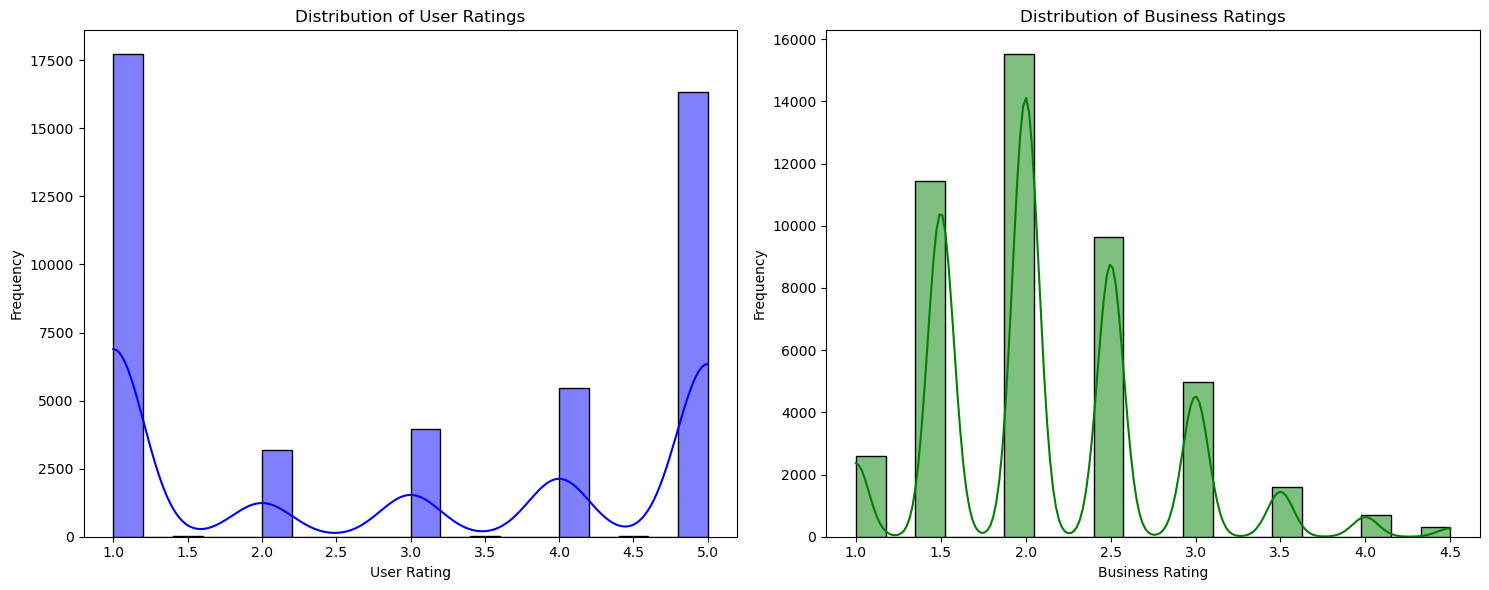

In [137]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(merged_data['User rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of User Ratings')
plt.xlabel('User Rating')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(merged_data['b/s rating'], bins=20, kde=True, color='green')
plt.title('Distribution of Business Ratings')
plt.xlabel('Business Rating')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


There are class imbalances so during the Machine learning, consider random sampling or SMOTE

c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


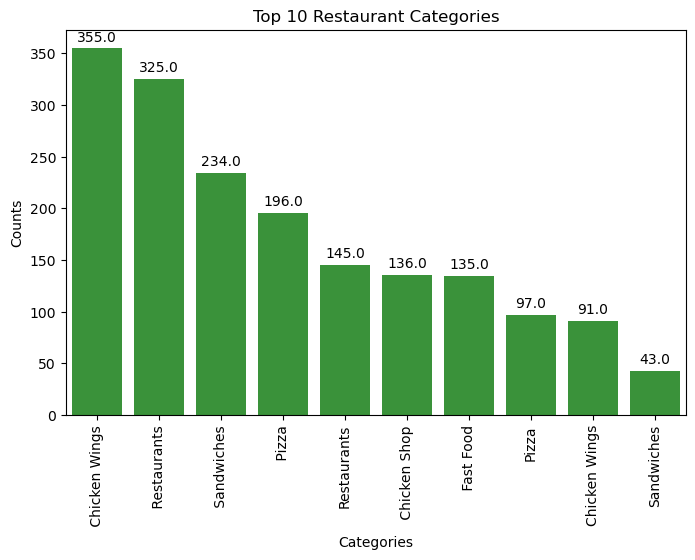

In [150]:
import collections

# Use for loops
categories = [cat for category in merged_data.drop_duplicates('business_id').categories for cat in category.split(',')]
# Count occurrences of each category
categories_count = collections.Counter(categories)

# Picking the top 10 categories
common = categories_count.most_common(10)

# Plotting
fig, ax = plt.subplots(figsize=(8, 5))
x = [i[0] for i in common]  
y = [i[1] for i in common]

sns.barplot(x=x, y=y, color='tab:green', ax=ax)
ax.set_xlabel("Categories")
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel("Counts")
# Adjust or remove y-axis limits if needed
# ax.set_ylim([0, max(y) + 10])  # Dynamically set limits based on data
ax.set_title("Top 10 Restaurant Categories")
ax.bar_label(ax.containers[0], padding=3, fmt='{:,}')

plt.show()


In [143]:
r_data= merged_data[['User rating', 'b/s rating','review_count']]
r_data.corr()

,User rating,b/s rating,review_count
User rating,1.000000,0.018710,0.008009
b/s rating,0.018710,1.000000,-0.182582
review_count,0.008009,-0.182582,1.000000


# Check for multicollinearity
Show reasons why im dropping a column
preprocess the numeric and preprocess the categorical


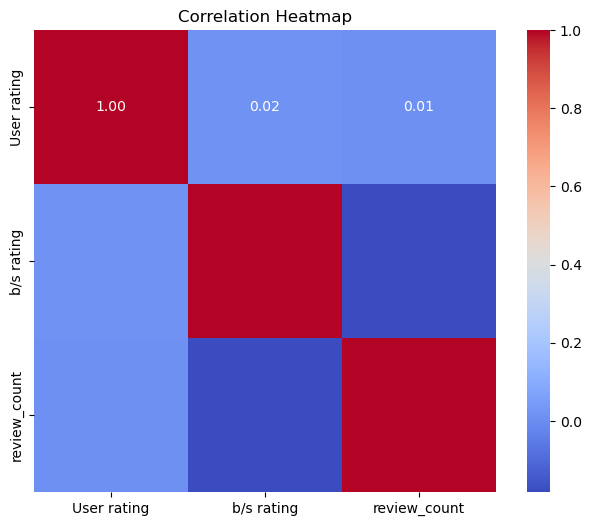

In [144]:


correlation_matrix = merged_data[['User rating', 'b/s rating', 'review_count']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


#### User rating vs. b/s rating:

Correlation: 0.018710

 There is a very weak positive correlation between User rating and b/s rating, suggesting that as one rating increases, the other does so slightly but not significantly.

#### User rating vs. review_count:

Correlation: 0.008009

 There is virtually no correlation between User rating and review_count, indicating that the number of reviews does not significantly affect the user ratings.

#### b/s rating vs. review_count:

Correlation: -0.182582

There is a weak negative correlation between b/s rating and review_count, which suggests that as the review count increases, the b/s rating tends to decrease slightly.

### Distribution of Categories


c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


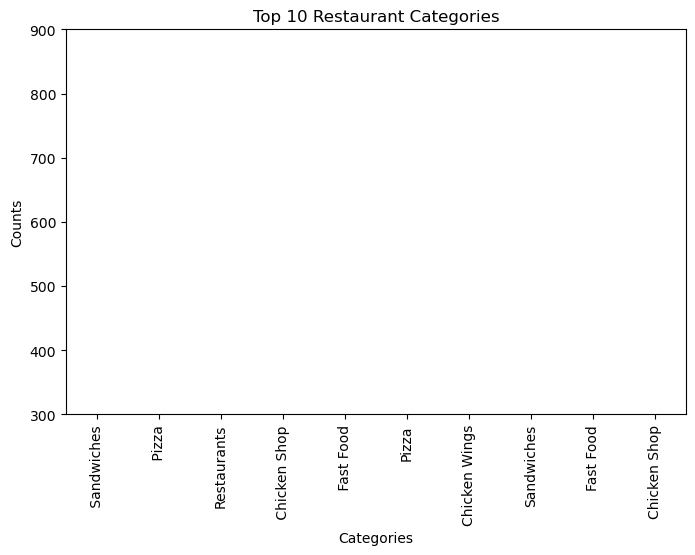

In [146]:
import collections
categories=[ cat for category in merged_data.drop_duplicates('business_id').categories for cat in category.split(',')]
# list of unique categories only
categories=collections.Counter(categories)
#picking the top 20 categories
common=categories.most_common(12)
# ploting
fig, ax=plt.subplots(figsize=(8,5))
x=[ i[0] for i in common[2:]]
y=[i[1] for i in common[2:]]
sns.barplot(x=x, y=y, color='tab:blue', ax=ax)
ax.set_xlabel("Categories")
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel("Counts")
ax.set_ylim([300,900])
ax.set_title("Top 10 Restaurant Categories");
ax.bar_label( ax.containers[0], padding=3, fmt='{:,}');

In [147]:
merged_data.head()

,Restaurant,Review,User rating,Metadata,Time,business_id,b/s rating,review_count,attributes,categories,hours,Location
0,KFC,Good atmosphere to eat with relax.tastes good....,4.0,"10 Reviews , 1 Follower",5/22/2019 17:21,yFqq66GxRjnhZXPgjA6hnw,2.0,7,"{'OutdoorSeating': 'False', 'WiFi': ""'free'"", ...","Restaurants, Chicken Shop, Fast Food, Chicken ...","{'Monday': '10:30-23:0', 'Tuesday': '10:30-23:...","State: PA, City: Philadelphia, Address: 716 Ad..."
1,KFC,Good atmosphere to eat with relax.tastes good....,4.0,"10 Reviews , 1 Follower",5/22/2019 17:21,0xe81EigRw_b5W8tg0Ca6Q,1.5,19,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...","Fast Food, Chicken Wings, Restaurants, Chicken...","{'Monday': '10:30-23:0', 'Tuesday': '10:30-23:...","State: FL, City: New Port Richey, Address: 824..."
2,KFC,Good atmosphere to eat with relax.tastes good....,4.0,"10 Reviews , 1 Follower",5/22/2019 17:21,nqzOH_1CBGe2VrsxTziuvg,1.5,5,"{'RestaurantsTakeOut': 'True', 'GoodForKids': ...","Chicken Shop, Chicken Wings, Fast Food, Restau...",Unavailable,"State: MO, City: Saint Louis, Address: 430 S 1..."
3,KFC,Good atmosphere to eat with relax.tastes good....,4.0,"10 Reviews , 1 Follower",5/22/2019 17:21,a8Q2bvUW6mAiws7xW7cS6g,1.5,45,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...","Restaurants, Fast Food, Chicken Wings, Chicken...","{'Monday': '10:30-0:0', 'Tuesday': '10:30-0:0'...","State: PA, City: Exton, Address: 104 N Pottsto..."
4,KFC,Good atmosphere to eat with relax.tastes good....,4.0,"10 Reviews , 1 Follower",5/22/2019 17:21,rZZ6gtsqBVkpSLoZ9EZ_1A,1.5,28,"{'OutdoorSeating': 'False', 'RestaurantsAttire...","Chicken Wings, Chicken Shop, Restaurants, Fast...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-22:0', ...","State: FL, City: Oldsmar, Address: 3144 Tampa Rd"


        User rating    b/s rating  review_count
count  46707.000000  46707.000000  46707.000000
mean       2.990216      2.127754     19.717066
std        1.761280      0.658564     14.865314
min        1.000000      1.000000      5.000000
25%        1.000000      1.500000     11.000000
50%        3.000000      2.000000     15.000000
75%        5.000000      2.500000     25.000000
max        5.000000      4.500000    131.000000


c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


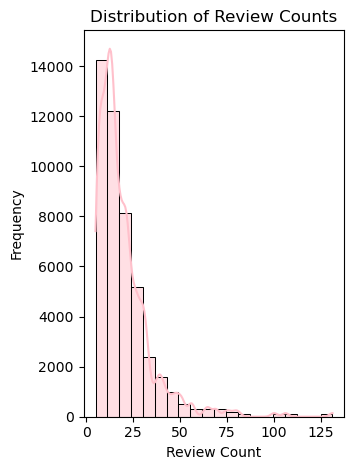

In [156]:
# Descriptive statistics for numerical columns
print(merged_data[['User rating', 'b/s rating', 'review_count']].describe())



plt.subplot(1, 2, 2)
sns.histplot(merged_data['review_count'], bins=20, kde=True, color='pink')
plt.title('Distribution of Review Counts')
plt.xlabel('Review Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
